In [2]:
import pandas as pd
import pickle
import shap

### Decision Tree

#### 5% true labels

In [70]:
with open('../Machine_Learning/Models/Decision Tree_model_5.pkl', 'rb') as f:
    dtree = pickle.load(f)
X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')
y_test_5 = pd.read_csv('data/y_test_unique_5_shuffled.csv')

In [71]:
y_pred = dtree.predict(X_test_5)

In [72]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_5, y_pred))

[[516  16]
 [ 11  17]]


[Text(0.5555555555555556, 0.875, 'x[31] <= 0.004\ngini = 0.095\nsamples = 920\nvalue = [874, 46]'),
 Text(0.3333333333333333, 0.625, 'x[46] <= 0.055\ngini = 0.02\nsamples = 880\nvalue = [871, 9]'),
 Text(0.2222222222222222, 0.375, 'x[60] <= -0.06\ngini = 0.005\nsamples = 873\nvalue = [871, 2]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 871\nvalue = [871, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7777777777777778, 0.625, 'x[48] <= 0.033\ngini = 0.139\nsamples = 40\nvalue = [3, 37]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

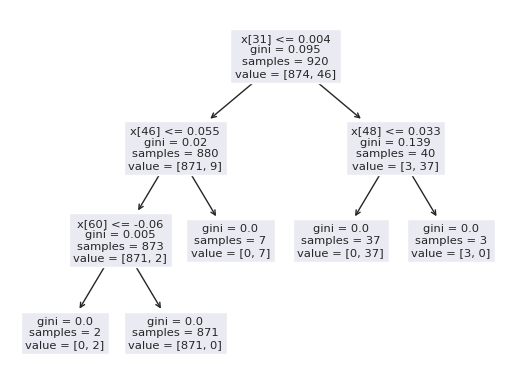

In [73]:
from sklearn import tree
tree.plot_tree(dtree)


In [74]:
X_test_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000063,0.000000,0.000000,0.000000,...,0.032946,0.032091,0.045823,-0.006037,0.019346,-0.027501,-0.007555,0.010331,0.043286,-0.009257
1,0.000000,0.000377,0.002639,0.004461,0.002639,0.001445,0.001005,0.000189,0.000189,0.000000,...,-0.003122,0.014283,-0.009054,0.030451,0.020530,-0.004036,-0.009055,0.018825,0.026272,-0.031567
2,0.000000,0.000000,0.000000,0.000189,0.000000,0.000566,0.000189,0.000189,0.000063,0.000000,...,0.028097,0.024435,0.007179,0.000228,0.004108,-0.004898,-0.035987,0.047153,0.046459,0.045437
3,0.000000,0.000000,0.000000,0.000126,0.000000,0.000000,0.000063,0.000063,0.000000,0.000000,...,-0.023030,0.011413,0.015250,0.018079,0.011128,-0.000364,0.037997,-0.010287,0.001667,0.011803
4,0.000000,0.000000,0.000063,0.000063,0.000314,0.000063,0.000063,0.000126,0.000000,0.000000,...,0.005062,-0.008273,0.033750,-0.039425,0.038967,-0.008725,0.045750,0.011778,-0.044742,0.044148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.000000,0.000000,0.000000,0.000063,0.000063,0.000063,0.000063,0.000063,0.000000,0.000000,...,-0.026966,-0.032755,0.007869,-0.013987,-0.036177,0.037844,-0.018195,-0.006673,-0.029474,0.014972
556,0.000063,0.002702,0.024568,0.042664,0.043607,0.042413,0.020170,0.004901,0.000691,0.000063,...,0.039513,-0.042837,-0.049709,-0.039103,0.024364,0.028264,-0.015928,0.001121,-0.008298,0.004273
557,0.000000,0.000000,0.000000,0.000000,0.000126,0.000189,0.000063,0.000126,0.000000,0.000000,...,-0.036670,-0.032177,0.005978,0.043500,0.008673,-0.031770,0.030728,-0.027193,-0.034798,-0.036403
558,0.000000,0.000000,0.000063,0.000063,0.000189,0.000063,0.000063,0.000000,0.000000,0.000000,...,0.000402,-0.041508,0.025174,0.010487,0.025288,0.030058,0.034490,0.030905,0.009920,-0.026193


In [75]:
shap.initjs()

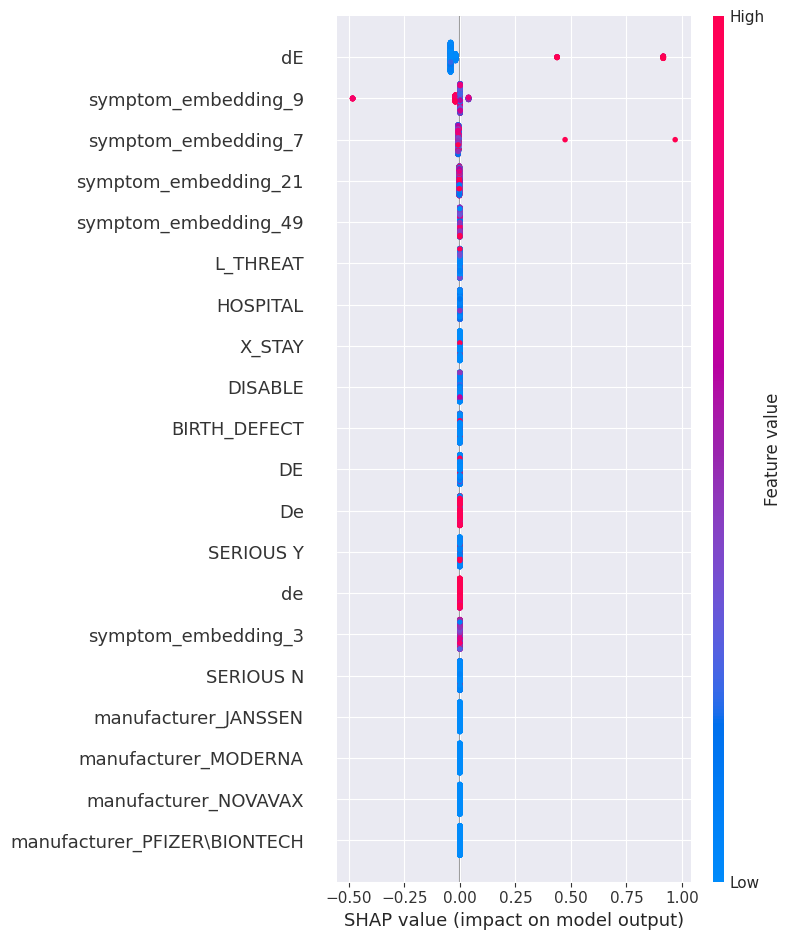

In [76]:
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test_5)
shap.summary_plot(shap_values[1], X_test_5)

In [89]:
shap_values[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 10% true labels

In [2]:
with open('../Machine_Learning/Models/Decision Tree_model_10.pkl', 'rb') as f:
    dtree_10 = pickle.load(f)
X_test_10 = pd.read_csv('data/X_test_unique_10_shuffled.csv')

[Text(0.6, 0.8333333333333334, 'x[31] <= 0.004\ngini = 0.18\nsamples = 460\nvalue = [414, 46]'),
 Text(0.4, 0.5, 'x[67] <= -0.048\ngini = 0.042\nsamples = 423\nvalue = [414, 9]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 414\nvalue = [414, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]')]

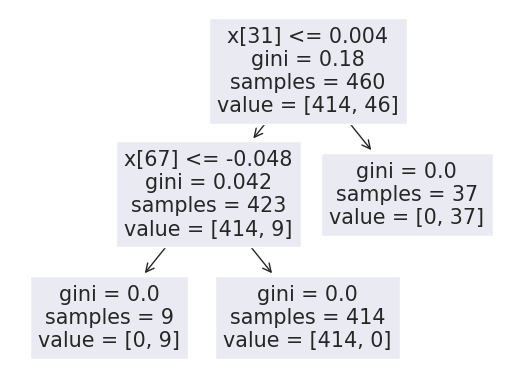

In [110]:
tree.plot_tree(dtree_10)

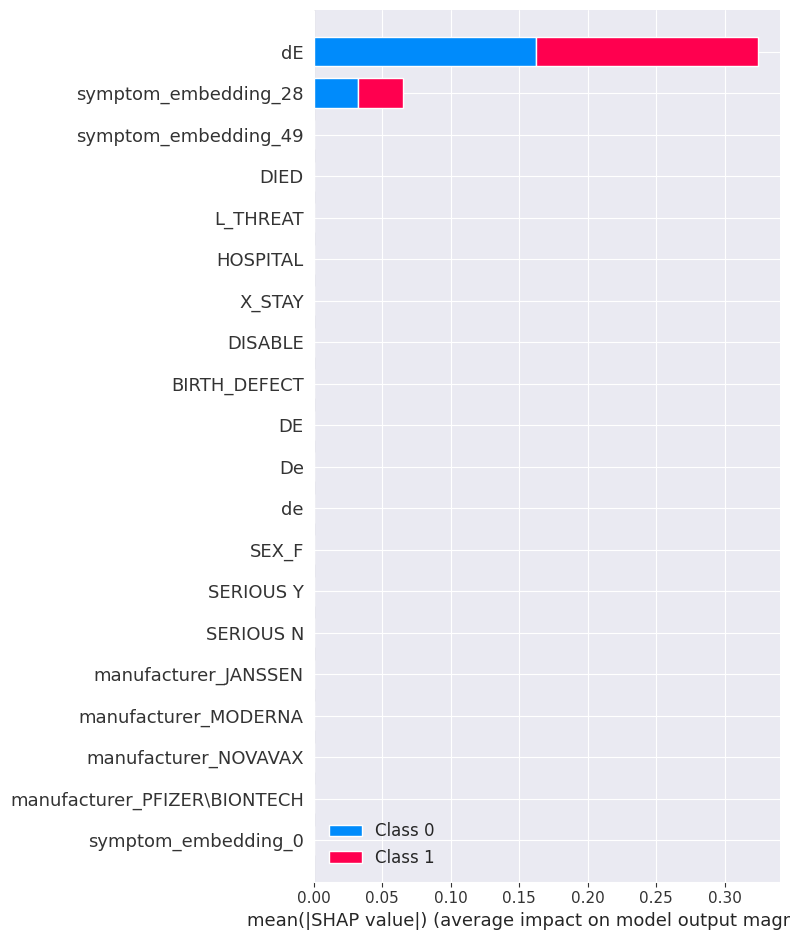

In [112]:
ex = shap.TreeExplainer(dtree_10)
shap_values = ex.shap_values(X_test_10)
shap.summary_plot(shap_values, X_test_10)

In [3]:
shap_values[1]

NameError: name 'shap_values' is not defined

In [20]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=dtree_10.predict, masker=background, feature_names=X_test_10.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

In [23]:
shap_values_dt_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
shap_values_dt_10.mul(1000)
shap_values_dt_10.max()

0-9                     0.0
10-19                   0.0
20-29                   0.0
30-39                   0.0
40-49                   0.0
                       ... 
symptom_embedding_45    0.0
symptom_embedding_46    0.0
symptom_embedding_47    0.0
symptom_embedding_48    0.0
symptom_embedding_49    0.0
Length: 89, dtype: float64

In [15]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [19]:
shap_values_dt_10_fl = pd.DataFrame()

shap_values_dt_10_fl['age_group'] = shap_values_dt_10[age_cols].sum(axis=1).mul(1000)
shap_values_dt_10_fl.max()

age_group    0.0
dtype: float64

### Random Forest

#### 5% true labels

In [68]:
with open('../Machine_Learning/Models/Random Forest_model_5.pkl', 'rb') as f:
    randomforest_5 = pickle.load(f)

[Text(0.6666666666666666, 0.875, 'x[63] <= 0.057\ngini = 0.107\nsamples = 566\nvalue = [868, 52]'),
 Text(0.5, 0.625, 'x[73] <= 0.058\ngini = 0.014\nsamples = 538\nvalue = [868, 6]'),
 Text(0.3333333333333333, 0.375, 'x[42] <= -0.05\ngini = 0.002\nsamples = 537\nvalue = [868, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 536\nvalue = [868, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 5]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 28\nvalue = [0, 46]')]

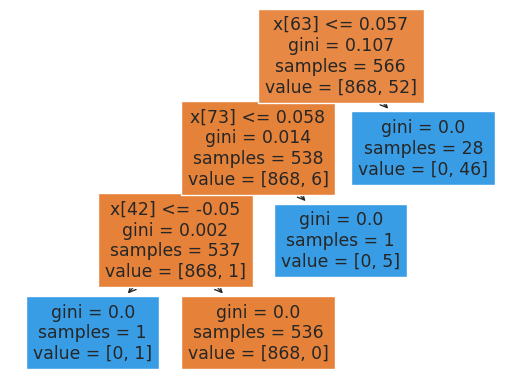

In [98]:
tree.plot_tree(randomforest_5.estimators_[0],
               filled = True)

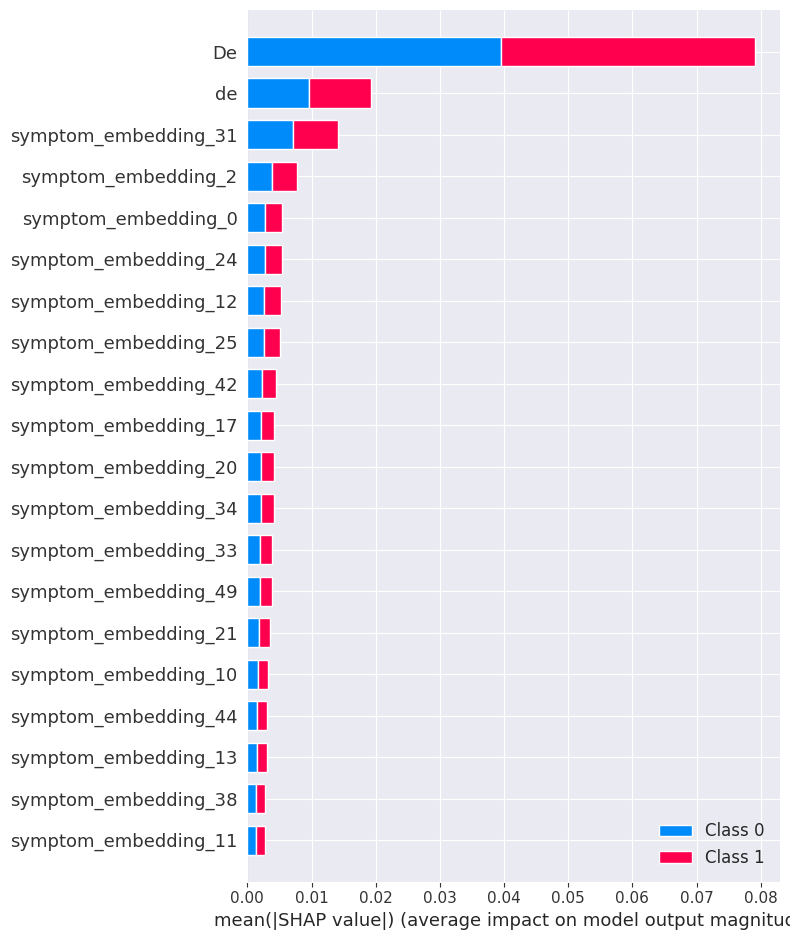

In [69]:
ex = shap.TreeExplainer(randomforest_5)
shap_values = ex.shap_values(X_test_5)
shap.summary_plot(shap_values, X_test_5)

#### 10% true labels

In [94]:
with open('../Machine_Learning/Models/Random Forest_model_10.pkl', 'rb') as f:
    randomforest_10 = pickle.load(f)

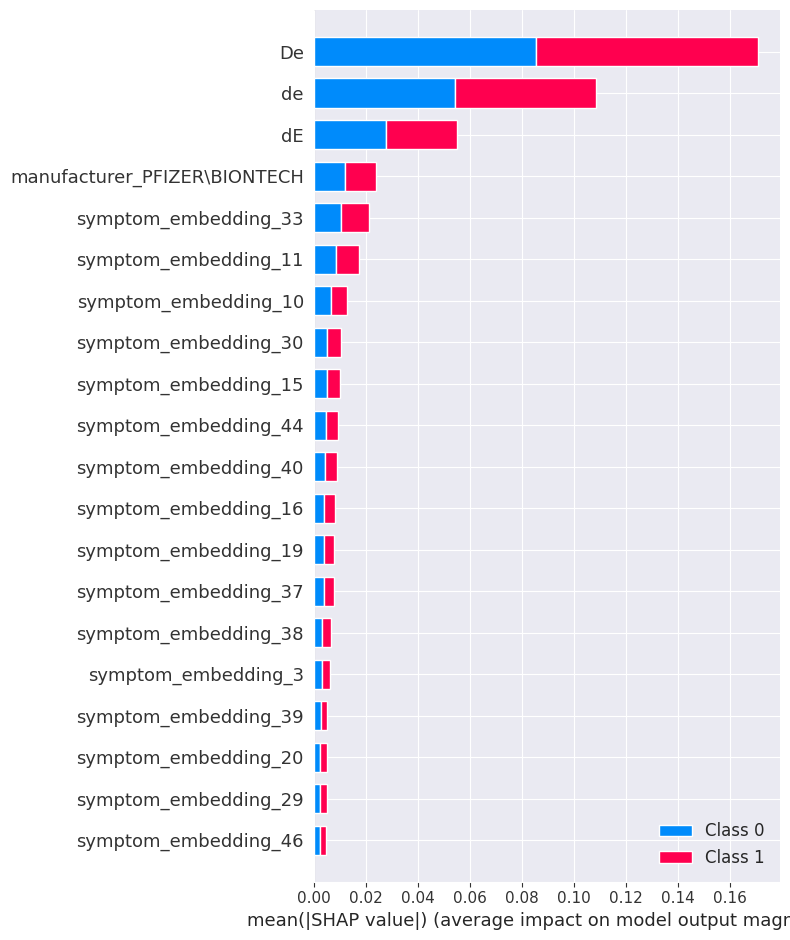

In [95]:
ex = shap.TreeExplainer(randomforest_10)
shap_values = ex.shap_values(X_test_10)
shap.summary_plot(shap_values, X_test_10)

### Logistic Regression

#### 5% true labels

In [98]:
with open('../Machine_Learning/Models/Logistic Regression_model_5.pkl', 'rb') as f:
    logreg_5 = pickle.load(f)
    X_train_5 = pd.read_csv('data/X_train_unique_5_shuffled.csv')
    X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')

In [99]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=logreg_5.predict, masker=background, feature_names=X_test_5.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [00:17, 13.85it/s]                         


In [100]:
shap_values_df = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_df.mul(1000)
shap_values_df

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
1,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
2,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
3,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
4,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.00,0.0,0.0000,-0.0025,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
556,0.0,0.0,0.04,0.0,0.0025,0.0100,0.0225,0.0,0.0,0.0,...,0.0125,-0.0275,0.1875,0.0525,0.0075,0.0,0.0,0.0,-0.0325,-0.0025
557,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
558,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000


In [101]:
symptom_cols = []

for col in shap_values_df.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_df.columns:
    if 'manufacturer_':
        vaccine_cols.append(col)

In [102]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [103]:
shap_values_df_fl = pd.DataFrame()

shap_values_df_fl['vaccine'] = shap_values_df[vaccine_cols].sum(axis=1)
shap_values_df_fl['symptom'] = shap_values_df[symptom_cols].sum(axis=1)
shap_values_df_fl['age_group'] = shap_values_df[age_cols].sum(axis=1)
shap_values_df_fl['sex'] = shap_values_df[sex_cols].sum(axis=1)
shap_values_df_fl['serious'] = shap_values_df[serious_cols].sum(axis=1)
shap_values_df_fl['seriousness'] = shap_values_df[reaction_cols].sum(axis=1)
shap_values_df_fl['numdays'] = shap_values_df[numdays_cols].sum(axis=1)
shap_values_df_fl['ct'] = shap_values_df[de_cols].sum(axis=1)

shap_values_df_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,-0.01,0.0025,0.0,-0.0025,-0.005,-0.0025,-0.0025,0.0
1,-0.01,0.0000,0.0,-0.0050,-0.005,0.0000,0.0000,0.0
2,-0.01,0.0000,0.0,0.0000,-0.005,0.0000,-0.0050,0.0
3,-0.01,0.0000,0.0,-0.0050,-0.005,0.0000,0.0000,0.0
4,-0.01,0.0000,0.0,-0.0025,-0.005,0.0000,-0.0025,0.0


In [104]:
shap_values_df_fl_abs = pd.DataFrame()

shap_values_df_fl_abs['vaccine'] = shap_values_df[vaccine_cols].sum(axis=1)
shap_values_df_fl_abs['age_group'] = shap_values_df[age_cols].abs().sum(axis=1)
shap_values_df_fl_abs['numdays'] = shap_values_df[numdays_cols].abs().sum(axis=1)
shap_values_df_fl_abs['sex'] = shap_values_df[sex_cols].abs().sum(axis=1)
shap_values_df_fl_abs['seriousness'] = shap_values_df[reaction_cols].abs().sum(axis=1)
shap_values_df_fl_abs['ct'] = shap_values_df[de_cols].abs().sum(axis=1)
shap_values_df_fl_abs['serious'] = shap_values_df[serious_cols].abs().sum(axis=1)
shap_values_df_fl_abs['symptom'] = shap_values_df[symptom_cols].abs().sum(axis=1)

shap_values_df_fl_abs.head()

,vaccine,age_group,numdays,sex,seriousness,ct,serious,symptom
0,-0.01,0.0,0.0025,0.0025,0.0025,0.0,0.005,0.0025
1,-0.01,0.0,0.0000,0.0050,0.0000,0.0,0.005,0.0000
2,-0.01,0.0,0.0050,0.0000,0.0000,0.0,0.005,0.0000
3,-0.01,0.0,0.0000,0.0050,0.0000,0.0,0.005,0.0000
4,-0.01,0.0,0.0025,0.0025,0.0000,0.0,0.005,0.0000


In [105]:
shap_values_df_fl.abs().mean(axis=0).mul(100)

vaccine        3.625000
symptom        0.509375
age_group      0.177679
sex            0.818304
serious        1.287500
seriousness    0.198661
numdays        0.789732
ct             0.026786
dtype: float64

In [106]:
shap_values_df_fl_abs.abs().mean(axis=0).mul(100)

vaccine        3.625000
age_group      0.177679
numdays        0.789732
sex            0.818304
seriousness    0.198661
ct             0.030357
serious        1.287500
symptom        1.445089
dtype: float64

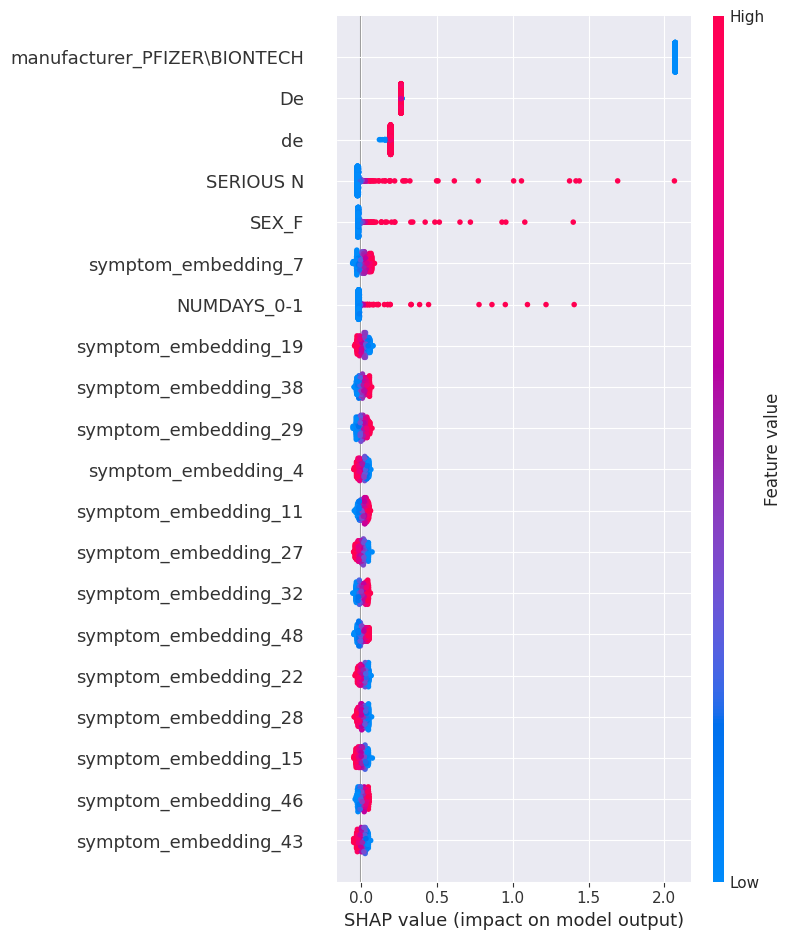

In [16]:
masker = shap.maskers.Independent(X_train_5)
# Initialize the LinearExplainer with the masker
ex = shap.LinearExplainer(logreg_5, masker)

shap_values = ex.shap_values(X_test_5)
shap.summary_plot(shap_values, X_test_5)

#### 10% true labels

In [107]:
with open('../Machine_Learning/Models/Logistic Regression_model_10.pkl', 'rb') as f:
    logreg_10 = pickle.load(f)
    X_train_10 = pd.read_csv('data/X_train_unique_10_shuffled.csv')
    X_test_10 = pd.read_csv('data/X_test_unique_10_shuffled.csv')

In [108]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=logreg_10.predict, masker=background, feature_names=X_test_10.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 281it [00:10,  1.07it/s]                         


In [109]:
shap_values_df = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_df.mul(1000)
shap_values_df.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0000,0.0000,0.0,-0.0025,0.0000,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0100,-0.0025,0.0,0.0000,0.0000,0.0025,-0.005
1,0.0,0.0,0.0025,0.0025,0.0,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0,-0.0025,0.0000,0.0000,0.000
2,0.0,0.0,0.0000,0.0000,0.0,0.0000,-0.0025,0.0,0.0,0.0,...,0.0000,0.0,-0.0050,0.0000,0.0025,0.0,0.0000,0.0025,0.0000,0.000
3,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,...,-0.0025,0.0,0.0000,-0.0025,0.0000,0.0,-0.0025,0.0000,0.0000,0.000
4,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0,-0.0025,-0.0050,0.0000,0.0,0.0025,0.0000,0.0000,0.000


In [110]:
symptom_cols = []

for col in shap_values_df.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_df.columns:
    if 'manufacturer_':
        vaccine_cols.append(col)

In [111]:
shap_values_df_fl = pd.DataFrame()

shap_values_df_fl['vaccine'] = shap_values_df[vaccine_cols].sum(axis=1)
shap_values_df_fl['symptom'] = shap_values_df[symptom_cols].sum(axis=1)
shap_values_df_fl['age_group'] = shap_values_df[age_cols].sum(axis=1)
shap_values_df_fl['sex'] = shap_values_df[sex_cols].sum(axis=1)
shap_values_df_fl['serious'] = shap_values_df[serious_cols].sum(axis=1)
shap_values_df_fl['seriousness'] = shap_values_df[reaction_cols].sum(axis=1)
shap_values_df_fl['numdays'] = shap_values_df[numdays_cols].sum(axis=1)
shap_values_df_fl['ct'] = shap_values_df[de_cols].sum(axis=1)

shap_values_df_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,-0.06,-0.0400,-0.0025,4.336809e-19,0.0150,-0.0225,-0.0100,0.0000
1,0.94,-0.0025,0.0050,2.375000e-01,0.2350,0.0075,0.4600,-0.0025
2,-0.06,-0.0050,-0.0025,-1.500000e-02,-0.0150,-0.0050,-0.0175,0.0000
3,-0.06,-0.0200,0.0000,-1.250000e-02,-0.0125,-0.0075,-0.0075,0.0000
4,-0.06,-0.0175,0.0000,-1.500000e-02,-0.0100,-0.0075,-0.0125,0.0025


In [112]:
shap_values_df_fl_abs = pd.DataFrame()

shap_values_df_fl_abs['vaccine'] = shap_values_df[vaccine_cols].sum(axis=1)
shap_values_df_fl_abs['age_group'] = shap_values_df[age_cols].abs().sum(axis=1)
shap_values_df_fl_abs['numdays'] = shap_values_df[numdays_cols].abs().sum(axis=1)
shap_values_df_fl_abs['sex'] = shap_values_df[sex_cols].abs().sum(axis=1)
shap_values_df_fl_abs['seriousness'] = shap_values_df[reaction_cols].abs().sum(axis=1)
shap_values_df_fl_abs['ct'] = shap_values_df[de_cols].abs().sum(axis=1)
shap_values_df_fl_abs['serious'] = shap_values_df[serious_cols].abs().sum(axis=1)
shap_values_df_fl_abs['symptom'] = shap_values_df[symptom_cols].abs().sum(axis=1)

shap_values_df_fl_abs

,vaccine,age_group,numdays,sex,seriousness,ct,serious,symptom
0,-0.06,0.0025,0.0100,0.0050,0.0225,0.0000,0.0200,0.1000
1,0.94,0.0050,0.4600,0.2375,0.0075,0.0025,0.2350,0.0075
2,-0.06,0.0025,0.0175,0.0150,0.0050,0.0000,0.0150,0.0450
3,-0.06,0.0000,0.0075,0.0125,0.0075,0.0000,0.0125,0.0250
4,-0.06,0.0000,0.0125,0.0150,0.0075,0.0025,0.0100,0.0425
...,...,...,...,...,...,...,...,...
275,-0.06,0.0000,0.0175,0.0150,0.0075,0.0000,0.0125,0.0275
276,-0.06,0.0025,0.0175,0.0175,0.0075,0.0025,0.0100,0.0375
277,-0.06,0.0000,0.0175,0.0100,0.0075,0.0000,0.0075,0.0275
278,-0.06,0.0000,0.0150,0.0175,0.0050,0.0000,0.0150,0.0325


In [113]:
shap_values_df_fl.abs().mean(axis=0).mul(100)

vaccine        11.657143
symptom         1.633929
age_group       0.526786
sex             3.206250
serious         3.184821
seriousness     1.300000
numdays         2.341071
ct              0.105357
dtype: float64

In [114]:
shap_values_df_fl_abs.abs().mean(axis=0).mul(100)

vaccine        11.657143
age_group       0.533929
numdays         2.341071
sex             3.209821
seriousness     1.308929
ct              0.128571
serious         3.195536
symptom         6.008929
dtype: float64

In [ ]:
#---------------

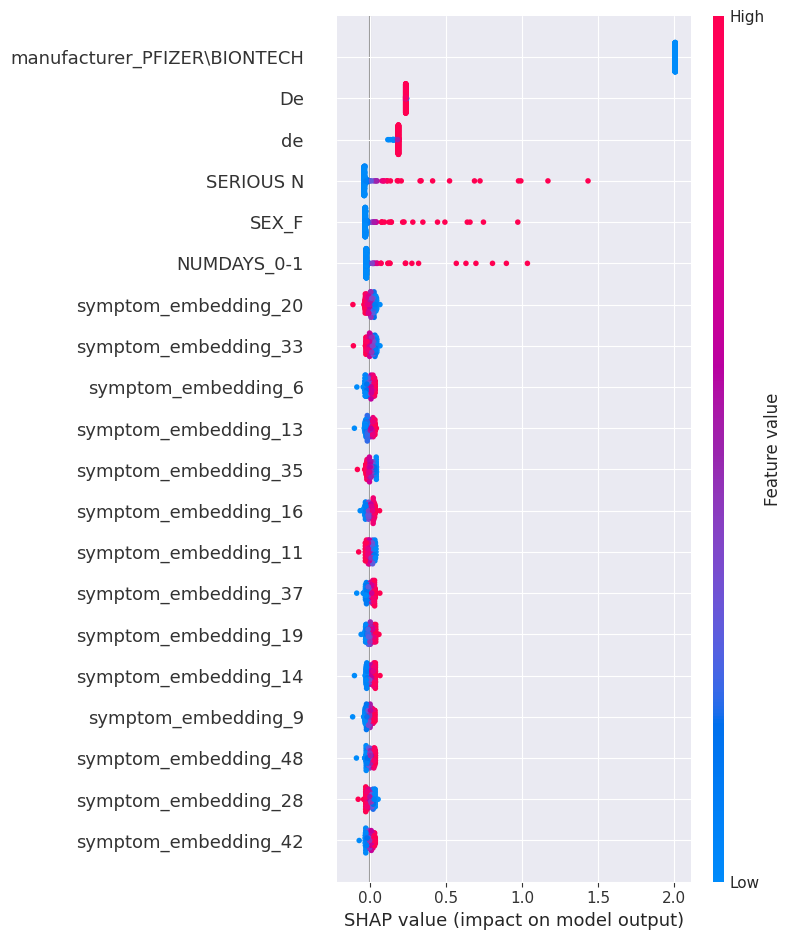

In [75]:
masker = shap.maskers.Independent(X_train_10)
# Initialize the LinearExplainer with the masker
ex = shap.LinearExplainer(logreg_10, masker)

shap_values = ex.shap_values(X_test_10)
shap.summary_plot(shap_values, X_test_10)

### K-Nearest Neighbors

#### 5% true labels

In [147]:
with open('../Machine_Learning/Models/K-Nearest Neighbors_model_5.pkl', 'rb') as f:
    KNN_5 = pickle.load(f)
    
X_train_5 = pd.read_csv('data/X_train_unique_5_shuffled.csv')
X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')

In [148]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=KNN_5.predict, masker=background, feature_names=X_test_5.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [06:26,  1.41it/s]                         


In [150]:
shap_values_knn_5 = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_df.mul(1000)
shap_values_knn_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0050,-0.0050,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0050,-0.0025,-0.0075,-0.0025,0.0000,-0.0075,0.0025,0.0125,0.0025
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.0025,0.0025,0.0025,0.0025
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0025,0.0000,0.0025,0.0000,-0.0050,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0025,0.0050,0.0000,0.0000,0.0025,0.0000
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,-0.0050,0.0000,0.0075,-0.0025,0.0025,0.0050,0.0000,0.0050,0.0000
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0025,0.0000,-0.0025,0.0000,0.0000,0.0100,0.0025,-0.0025,-0.0100
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,-0.0100,-0.0025,-0.0025,0.0050,0.0025,0.0000,0.0000,-0.0025


In [151]:
symptom_cols = []

for col in shap_values_knn_5.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_knn_5.columns:
    if 'manufacturer_':
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [152]:
shap_values_knn_5_fl = pd.DataFrame()

shap_values_knn_5_fl['vaccine'] = shap_values_knn_5[vaccine_cols].sum(axis=1)
shap_values_knn_5_fl['symptom'] = shap_values_knn_5[symptom_cols].sum(axis=1)
shap_values_knn_5_fl['age_group'] = shap_values_knn_5[age_cols].sum(axis=1)
shap_values_knn_5_fl['sex'] = shap_values_knn_5[sex_cols].sum(axis=1)
shap_values_knn_5_fl['serious'] = shap_values_knn_5[serious_cols].sum(axis=1)
shap_values_knn_5_fl['seriousness'] = shap_values_knn_5[reaction_cols].sum(axis=1)
shap_values_knn_5_fl['numdays'] = shap_values_knn_5[numdays_cols].sum(axis=1)
shap_values_knn_5_fl['ct'] = shap_values_knn_5[de_cols].sum(axis=1)

shap_values_knn_5_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.01,0.01,0.0,0.0,-0.0025,0.0,0.0,0.0025
1,0.01,0.01,0.0,0.0,0.0000,0.0,0.0,0.0000
2,0.01,0.01,0.0,0.0,0.0000,0.0,0.0,0.0000
3,0.01,0.01,0.0,0.0,0.0000,0.0,0.0,0.0000
4,0.01,0.01,0.0,0.0,0.0000,0.0,0.0,0.0000


In [153]:
shap_values_knn_5_fl_abs = pd.DataFrame()

shap_values_knn_5_fl_abs['vaccine'] = shap_values_knn_5[vaccine_cols].sum(axis=1)
shap_values_knn_5_fl_abs['age_group'] = shap_values_knn_5[age_cols].abs().sum(axis=1)
shap_values_knn_5_fl_abs['numdays'] = shap_values_knn_5[numdays_cols].abs().sum(axis=1)
shap_values_knn_5_fl_abs['sex'] = shap_values_knn_5[sex_cols].abs().sum(axis=1)
shap_values_knn_5_fl_abs['seriousness'] = shap_values_knn_5[reaction_cols].abs().sum(axis=1)
shap_values_knn_5_fl_abs['ct'] = shap_values_knn_5[de_cols].abs().sum(axis=1)
shap_values_knn_5_fl_abs['serious'] = shap_values_knn_5[serious_cols].abs().sum(axis=1)
shap_values_knn_5_fl_abs['symptom'] = shap_values_knn_5[symptom_cols].abs().sum(axis=1)

shap_values_knn_5_fl_abs.head()

,vaccine,age_group,numdays,sex,seriousness,ct,serious,symptom
0,0.01,0.0,0.0,0.0,0.0,0.0025,0.0025,0.095
1,0.01,0.0,0.0,0.0,0.0,0.0000,0.0000,0.025
2,0.01,0.0,0.0,0.0,0.0,0.0000,0.0000,0.180
3,0.01,0.0,0.0,0.0,0.0,0.0000,0.0000,0.070
4,0.01,0.0,0.0,0.0,0.0,0.0000,0.0000,0.045


In [154]:
shap_values_knn_5_fl.abs().mean(axis=0).mul(100)

vaccine        5.900000
symptom        5.921429
age_group      0.008929
sex            0.093750
serious        0.045089
seriousness    0.041518
numdays        0.033036
ct             0.214286
dtype: float64

In [155]:
shap_values_knn_5_fl_abs.abs().mean(axis=0).mul(100)

vaccine         5.900000
age_group       0.010714
numdays         0.033036
sex             0.093750
seriousness     0.041518
ct              0.281250
serious         0.045089
symptom        18.083036
dtype: float64

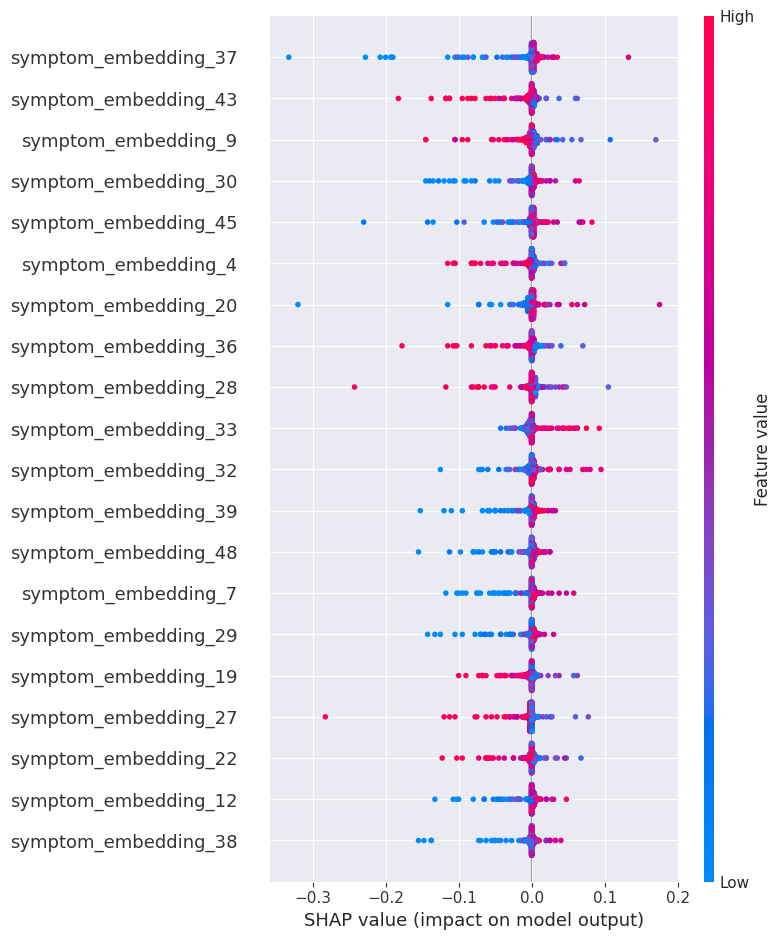

In [87]:
shap.summary_plot(shap_values, X_test_5)

#### 10% true labels

In [132]:
with open('../Machine_Learning/Models/K-Nearest Neighbors_model_10.pkl', 'rb') as f:
    KNN_10 = pickle.load(f)
    
X_train_10 = pd.read_csv('data/X_train_unique_10_shuffled.csv')
X_test_10 = pd.read_csv('data/X_test_unique_10_shuffled.csv')

In [133]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=KNN_10.predict, masker=background, feature_names=X_test_10.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 281it [03:02,  1.46it/s]                         


In [141]:
shap_values_knn_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_knn_10.mul(1000)
shap_values_knn_10

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,-0.0025,0.0100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000
1,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0075,0.0000,0.0025,0.0100,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0050,0.0025,0.0075,0.0050,-0.0025,-0.0025,0.0000,0.0000
3,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0100,0.0000,0.0025,0.0000,0.0000,0.0000,-0.0025,-0.0025
4,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,-0.0025,0.0025,0.0000,0.0050,0.0025,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
276,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,-0.0025,0.0025,0.0000,0.0025,0.0025,0.0000,0.0000,0.0000,0.0000
277,0.0,0.0,0.0025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0050,0.0000,0.0100,0.0050,0.0000,0.0000,0.0025,0.0000,0.0025,0.0000
278,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0075,0.0000,0.0025,0.0025,0.0000,0.0000,0.0000,-0.0025


In [142]:
symptom_cols = []

for col in shap_values_knn_10.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_knn_10.columns:
    if 'manufacturer_':
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [143]:
shap_values_knn_10_fl = pd.DataFrame()

shap_values_knn_10_fl['vaccine'] = shap_values_knn_10[vaccine_cols].sum(axis=1)
shap_values_knn_10_fl['symptom'] = shap_values_knn_10[symptom_cols].sum(axis=1)
shap_values_knn_10_fl['age_group'] = shap_values_knn_10[age_cols].sum(axis=1)
shap_values_knn_10_fl['sex'] = shap_values_knn_10[sex_cols].sum(axis=1)
shap_values_knn_10_fl['serious'] = shap_values_knn_10[serious_cols].sum(axis=1)
shap_values_knn_10_fl['seriousness'] = shap_values_knn_10[reaction_cols].sum(axis=1)
shap_values_knn_10_fl['numdays'] = shap_values_knn_10[numdays_cols].sum(axis=1)
shap_values_knn_10_fl['ct'] = shap_values_knn_10[de_cols].sum(axis=1)

shap_values_knn_10_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.04,0.0400,0.0,0.0000,0.0000,0.0025,0.0,-0.0025
1,0.04,0.0325,0.0,0.0075,0.0175,0.0000,0.0,-0.0175
2,0.04,0.0375,0.0,-0.0025,0.0000,0.0000,0.0,0.0050
3,0.04,0.0400,0.0,0.0000,0.0000,0.0000,0.0,0.0000
4,0.04,0.0400,0.0,0.0000,0.0000,0.0000,0.0,0.0000


In [144]:
shap_values_knn_10_fl_abs = pd.DataFrame()

shap_values_knn_10_fl_abs['vaccine'] = shap_values_knn_10[vaccine_cols].sum(axis=1)
shap_values_knn_10_fl_abs['age_group'] = shap_values_knn_10[age_cols].abs().sum(axis=1)
shap_values_knn_10_fl_abs['numdays'] = shap_values_knn_10[numdays_cols].abs().sum(axis=1)
shap_values_knn_10_fl_abs['sex'] = shap_values_knn_10[sex_cols].abs().sum(axis=1)
shap_values_knn_10_fl_abs['seriousness'] = shap_values_knn_10[reaction_cols].abs().sum(axis=1)
shap_values_knn_10_fl_abs['ct'] = shap_values_knn_10[de_cols].abs().sum(axis=1)
shap_values_knn_10_fl_abs['serious'] = shap_values_knn_10[serious_cols].abs().sum(axis=1)
shap_values_knn_10_fl_abs['symptom'] = shap_values_knn_10[symptom_cols].abs().sum(axis=1)

shap_values_knn_10_fl_abs.head()

,vaccine,age_group,numdays,sex,seriousness,ct,serious,symptom
0,0.04,0.0,0.0,0.0000,0.0025,0.0025,0.0000,0.0900
1,0.04,0.0,0.0,0.0075,0.0000,0.0175,0.0175,0.0575
2,0.04,0.0,0.0,0.0025,0.0000,0.0050,0.0000,0.0825
3,0.04,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0700
4,0.04,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0700


In [145]:
shap_values_knn_10_fl.abs().mean(axis=0).mul(100)

vaccine        6.628571
symptom        6.613393
age_group      0.017857
sex            0.105357
serious        0.073214
seriousness    0.026786
numdays        0.049107
ct             0.244643
dtype: float64

In [146]:
shap_values_knn_10_fl_abs.abs().mean(axis=0).mul(100)

vaccine         6.628571
age_group       0.025000
numdays         0.049107
sex             0.107143
seriousness     0.028571
ct              0.321429
serious         0.075000
symptom        12.333036
dtype: float64

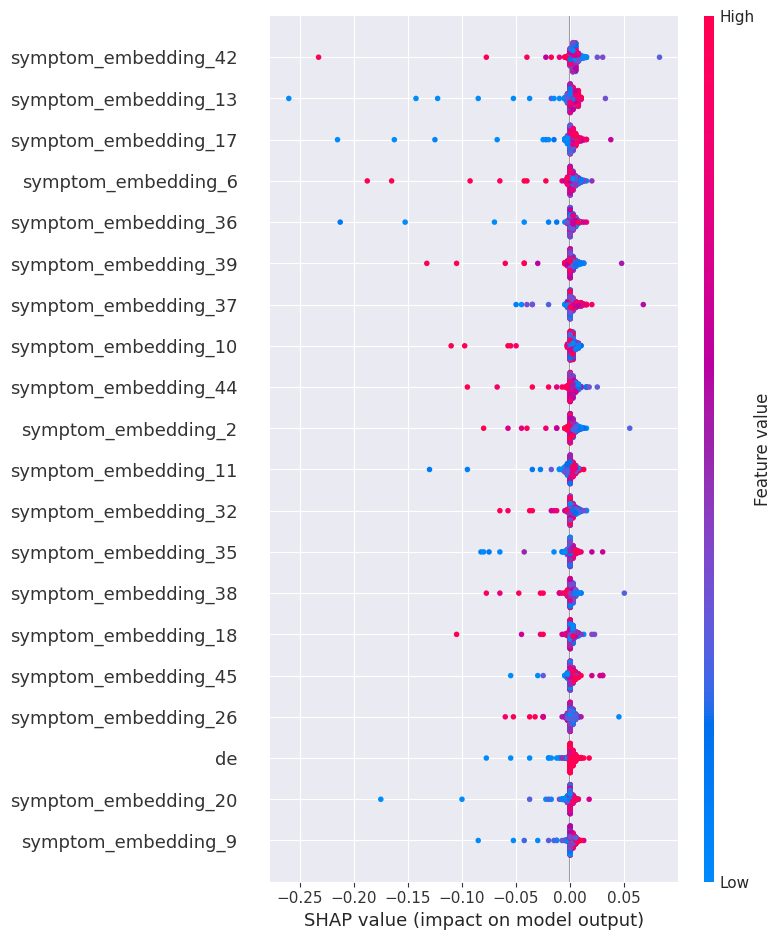

In [140]:
shap.summary_plot(shap_values, X_test_10)

### Naive Bayes

#### 5% true labels

In [115]:
with open('../Machine_Learning/Models/Naive Bayes_model_5.pkl', 'rb') as f:
    Naive_Bayes_5 = pickle.load(f)
    
X_train_5 = pd.read_csv('data/X_train_unique_5_shuffled.csv')
X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')

In [116]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=Naive_Bayes_5.predict, masker=background, feature_names=X_test_5.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [00:24, 13.53it/s]                         


In [117]:
shap_values_nb_5 = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_nb_5.mul(1000)
shap_values_nb_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0025,0.0000,0.0,0.0025,0.000,0.0000,0.0075,-0.0025
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0000,0.0000,0.0000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0025,0.0,0.0000,0.000,0.0025,0.0000,0.0000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0025,0.0025,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0,0.0000,0.0000,0.0,0.0025,0.000,0.0000,0.0000,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,-0.0025,0.0,0.0000,0.005,0.0000,0.0000,0.0000
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0000,0.0000,0.0000
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0025,0.0000,0.0,0.0000,0.000,0.0000,0.0000,-0.0025
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0025,0.0000,0.0,0.0000,0.000,0.0025,0.0000,0.0000


In [118]:
symptom_cols = []

for col in shap_values_nb_5.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_nb_5.columns:
    if 'manufacturer_':
        vaccine_cols.append(col)

In [119]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [120]:
shap_values_nb_5_fl = pd.DataFrame()

shap_values_nb_5_fl['vaccine'] = shap_values_nb_5[vaccine_cols].sum(axis=1)
shap_values_nb_5_fl['symptom'] = shap_values_nb_5[symptom_cols].sum(axis=1)
shap_values_nb_5_fl['age_group'] = shap_values_nb_5[age_cols].sum(axis=1)
shap_values_nb_5_fl['sex'] = shap_values_nb_5[sex_cols].sum(axis=1)
shap_values_nb_5_fl['serious'] = shap_values_nb_5[serious_cols].sum(axis=1)
shap_values_nb_5_fl['seriousness'] = shap_values_nb_5[reaction_cols].sum(axis=1)
shap_values_nb_5_fl['numdays'] = shap_values_nb_5[numdays_cols].sum(axis=1)
shap_values_nb_5_fl['ct'] = shap_values_nb_5[de_cols].sum(axis=1)

shap_values_nb_5_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.01,0.0100,0.0000,0.0,0.0,0.0000,0.0,0.0
1,0.01,0.0100,0.0000,0.0,0.0,0.0000,0.0,0.0
2,0.01,0.0150,-0.0025,0.0,0.0,-0.0025,0.0,0.0
3,0.01,0.0100,0.0000,0.0,0.0,0.0000,0.0,0.0
4,0.01,0.0125,0.0000,0.0,0.0,-0.0025,0.0,0.0


In [121]:
shap_values_nb_5_fl_abs = pd.DataFrame()

shap_values_nb_5_fl_abs['vaccine'] = shap_values_nb_5[vaccine_cols].sum(axis=1)
shap_values_nb_5_fl_abs['age_group'] = shap_values_nb_5[age_cols].abs().sum(axis=1)
shap_values_nb_5_fl_abs['numdays'] = shap_values_nb_5[numdays_cols].abs().sum(axis=1)
shap_values_nb_5_fl_abs['sex'] = shap_values_nb_5[sex_cols].abs().sum(axis=1)
shap_values_nb_5_fl_abs['seriousness'] = shap_values_nb_5[reaction_cols].abs().sum(axis=1)
shap_values_nb_5_fl_abs['ct'] = shap_values_nb_5[de_cols].abs().sum(axis=1)
shap_values_nb_5_fl_abs['serious'] = shap_values_nb_5[serious_cols].abs().sum(axis=1)
shap_values_nb_5_fl_abs['symptom'] = shap_values_nb_5[symptom_cols].abs().sum(axis=1)

shap_values_nb_5_fl_abs.head()

,vaccine,age_group,numdays,sex,seriousness,ct,serious,symptom
0,0.01,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0400
1,0.01,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0100
2,0.01,0.0025,0.0,0.0,0.0025,0.0,0.0,0.0400
3,0.01,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0100
4,0.01,0.0000,0.0,0.0,0.0025,0.0,0.0,0.0175


In [122]:
shap_values_nb_5_fl.abs().mean(axis=0).mul(100)

vaccine        3.275000
symptom        3.354464
age_group      0.088393
sex            0.027679
serious        0.008036
seriousness    0.141964
numdays        0.048661
ct             0.143304
dtype: float64

In [123]:
shap_values_nb_5_fl_abs  .abs().mean(axis=0).mul(100)

vaccine        3.275000
age_group      0.093750
numdays        0.052232
sex            0.027679
seriousness    0.145536
ct             0.173661
serious        0.008036
symptom        7.744643
dtype: float64

In [47]:
shap.summary_plot(shap_values, X_test_5)

PermutationExplainer explainer:  41%|████▏     | 231/560 [00:24<01:00,  5.41it/s]


KeyboardInterrupt: 

#### 10% true labels

In [124]:
with open('../Machine_Learning/Models/Naive Bayes_model_10.pkl', 'rb') as f:
    Naive_Bayes_10 = pickle.load(f)
    
X_train_10 = pd.read_csv('../Machine_Learning/data/X_train_unique_10_shuffled.csv')
X_test_10 = pd.read_csv('../Machine_Learning/data/X_test_unique_10_shuffled.csv')

In [125]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=Naive_Bayes_10.predict, masker=background, feature_names=X_test_10.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 281it [00:12,  4.32it/s]                         


In [126]:
shap_values_nb_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_nb_10.mul(1000)
shap_values_nb_10

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0075,0.0000,0.01,0.0000,0.005,0.0,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000
1,0.0,0.0,0.0000,0.0075,0.00,0.0075,0.000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000
2,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000
3,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.000,0.0,0.0000,0.0,...,0.0000,0.0025,0.0050,0.0000,0.0025,-0.0050,-0.0025,0.0,0.0,0.0000
4,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0025,0.0025,0.0000,0.0025,0.0000,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.000,0.0,0.0000,0.0,...,0.0025,0.0000,0.0025,0.0025,0.0000,0.0000,0.0000,0.0,0.0,0.0025
276,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.000,0.0,0.0000,0.0,...,0.0000,0.0075,0.0000,0.0000,0.0000,0.0025,-0.0100,0.0,0.0,-0.0025
277,0.0,0.0,0.0000,0.0000,0.00,-0.0025,0.000,0.0,-0.0025,0.0,...,0.0000,0.0025,0.0025,0.0000,0.0000,0.0025,0.0000,0.0,0.0,0.0000
278,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.000,0.0,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0050,0.0000,0.0000,0.0000,0.0,0.0,-0.0025


In [127]:
symptom_cols = []

for col in shap_values_nb_10.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_nb_10.columns:
    if 'manufacturer_':
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']


In [128]:
shap_values_nb_10_fl = pd.DataFrame()
shap_values_nb_10_fl['vaccine'] = shap_values_nb_10[vaccine_cols].sum(axis=1)
shap_values_nb_10_fl['symptom'] = shap_values_nb_10[symptom_cols].sum(axis=1)
shap_values_nb_10_fl['age_group'] = shap_values_nb_10[age_cols].sum(axis=1)
shap_values_nb_10_fl['sex'] = shap_values_nb_10[sex_cols].sum(axis=1)
shap_values_nb_10_fl['serious'] = shap_values_nb_10[serious_cols].sum(axis=1)
shap_values_nb_10_fl['seriousness'] = shap_values_nb_10[reaction_cols].sum(axis=1)
shap_values_nb_10_fl['numdays'] = shap_values_nb_10[numdays_cols].sum(axis=1)
shap_values_nb_10_fl['ct'] = shap_values_nb_10[de_cols].sum(axis=1)

shap_values_nb_10_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.03,0.0025,0.0225,0.0,0.0,0.0025,0.0025,0.0
1,0.03,0.0000,0.0150,0.0,0.0,0.0075,0.0075,0.0
2,0.03,0.0325,0.0000,0.0,0.0,0.0000,-0.0025,0.0
3,0.03,0.0300,0.0000,0.0,0.0,0.0000,0.0000,0.0
4,0.03,0.0300,0.0000,0.0,0.0,0.0000,0.0000,0.0


In [129]:
shap_values_nb_10_fl_abs = pd.DataFrame()

shap_values_nb_10_fl_abs['vaccine'] = shap_values_nb_10[vaccine_cols].sum(axis=1)
shap_values_nb_10_fl_abs['age_group'] = shap_values_nb_10[age_cols].abs().sum(axis=1)
shap_values_nb_10_fl_abs['numdays'] = shap_values_nb_10[numdays_cols].abs().sum(axis=1)
shap_values_nb_10_fl_abs['sex'] = shap_values_nb_10[sex_cols].abs().sum(axis=1)
shap_values_nb_10_fl_abs['seriousness'] = shap_values_nb_10[reaction_cols].abs().sum(axis=1)
shap_values_nb_10_fl_abs['ct'] = shap_values_nb_10[de_cols].abs().sum(axis=1)
shap_values_nb_10_fl_abs['serious'] = shap_values_nb_10[serious_cols].abs().sum(axis=1)
shap_values_nb_10_fl_abs['symptom'] = shap_values_nb_10[symptom_cols].abs().sum(axis=1)

shap_values_nb_10_fl_abs.head()

,vaccine,age_group,numdays,sex,seriousness,ct,serious,symptom
0,0.03,0.0225,0.0025,0.0,0.0025,0.0,0.0,0.0025
1,0.03,0.0150,0.0075,0.0,0.0075,0.0,0.0,0.0000
2,0.03,0.0000,0.0025,0.0,0.0000,0.0,0.0,0.0325
3,0.03,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0600
4,0.03,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0500


In [130]:
shap_values_nb_10_fl.abs().mean(axis=0).mul(100)

vaccine        6.021429
symptom        5.432143
age_group      0.218750
sex            0.073214
serious        0.027679
seriousness    0.251786
numdays        0.123214
ct             0.196429
dtype: float64

In [131]:
shap_values_nb_10_fl_abs.abs().mean(axis=0).mul(100)

vaccine        6.021429
age_group      0.227679
numdays        0.128571
sex            0.073214
seriousness    0.251786
ct             0.232143
serious        0.027679
symptom        7.530357
dtype: float64

PermutationExplainer explainer: 281it [00:21,  6.90it/s]                         


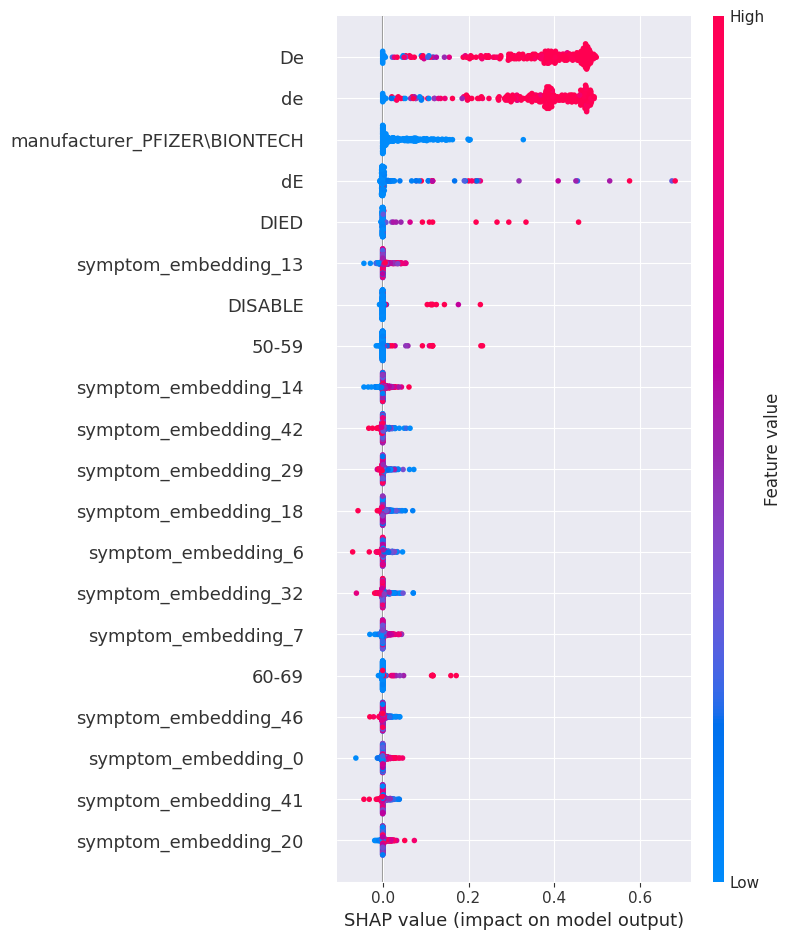

In [117]:
shap.summary_plot(shap_values, X_test_10)

In [118]:
shap_values

array([[ 0.     ,  0.     ,  0.00375, ...,  0.00125,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.00375,  0.     , ...,  0.     ,  0.     ,  0.015  ],
       ...,
       [ 0.     , -0.00125,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [-0.00125, -0.00125,  0.     , ...,  0.     ,  0.00125,  0.     ],
       [ 0.     ,  0.     , -0.0025 , ...,  0.     ,  0.     ,  0.00125]])